In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
import time
from tweepy import OAuthHandler

In [3]:
import datetime

In [4]:
ckey = 'OWea1JDj2RMgv9ktXcKkM3CRI'
csecret = 'zolroSpEUpqFrTABaVHttXDYrKAIWBBGPpFjXZ5j4r201obVWq'
atoken = '927171157018759173-tqtWOcZMkWsnCvUToWsR3W0qSp64jwm'
asecret = 'qMvXFuUpsnZD3b2TB1O49aGLSU6p607hDBnzkaYCdJWxR'

In [5]:
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

In [6]:
api = tweepy.API(auth)

### Create Functions to Get Tweets

In [7]:
def get_tweets(query, maxtweets):
    outtweets = [[time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet._json['created_at'],'%a %b %d %H:%M:%S +0000 %Y')),
                  tweet._json['created_at'][0:3], 
                  tweet._json["user"]["screen_name"], 
                  tweet._json["text"],
                  tweet._json["source"].split("\u003e")[1].split("</a\u003c\/a\u003e")[0][:-3], 
                  tweet._json['user']['location'],
                  tweet._json["retweet_count"],
                  tweet._json['favorite_count'],
                  tweet._json['user']['followers_count'],
                  tweet._json['user']['friends_count'],
                  tweet._json['user']['favourites_count']] for tweet in tweepy.Cursor(api.search, q=query,lang = "en", rpp=100).items(maxtweets)]
    return outtweets

In [8]:
def get_all_tweets(queries, maxtweets):
    tweets = []
    for query in queries:
        tweets = tweets + get_tweets(query, maxtweets)
    return tweets

In [9]:
def getDF(tweets):
    columns = ['Created At', 'Day', 'Screen Name', 'Text', 'Source', 'User Location', 'Retweet Count', 'Favourite Count', 'User Followers', 'User Friends', 'User Favorites']
    twDF = pd.DataFrame(tweets, columns=columns)
    twDF['Created At'] = pd.to_datetime(twDF['Created At'])
    twDF['Date Only'] = pd.to_datetime(twDF['Created At'].dt.date)
    return twDF

### Generate Targets

In [41]:
#input user targets (screenames) and keywords 
human_targets = ['bankofengland', 'MarketWatch', 'stockstobuy' ,'stocktwits', 'FiveThirtyEight', 'FT']
keywords = ['snp500', 'interest rate', 'shares', 'snapchat']

In [42]:
#creates query to extract any tweet containing the keyword by each user specified
def gen_queries(human_targets, keywords):
    user_targets = ['from:' + target for  target in human_targets]
    queries = [word + ', ' + user for word in keywords for user in user_targets]
    return queries

In [43]:
#list of queries
queries = gen_queries(human_targets, keywords)
queries

['snp500, from:bankofengland',
 'snp500, from:MarketWatch',
 'snp500, from:stockstobuy',
 'snp500, from:stocktwits',
 'snp500, from:FiveThirtyEight',
 'snp500, from:FT',
 'interest rate, from:bankofengland',
 'interest rate, from:MarketWatch',
 'interest rate, from:stockstobuy',
 'interest rate, from:stocktwits',
 'interest rate, from:FiveThirtyEight',
 'interest rate, from:FT',
 'shares, from:bankofengland',
 'shares, from:MarketWatch',
 'shares, from:stockstobuy',
 'shares, from:stocktwits',
 'shares, from:FiveThirtyEight',
 'shares, from:FT',
 'snapchat, from:bankofengland',
 'snapchat, from:MarketWatch',
 'snapchat, from:stockstobuy',
 'snapchat, from:stocktwits',
 'snapchat, from:FiveThirtyEight',
 'snapchat, from:FT']

In [59]:
tweets = get_all_tweets(queries, 30)
tweets

[['2018-02-26 13:42:02',
  'Mon',
  'MarketWatch',
  'Fed’s Bullard says low U.S. ‘neutral’ interest rate unlikely to rise over next 2 years https://t.co/7PjbjY8HWe',
  'SocialFlow',
  '',
  19,
  11,
  3581431,
  188,
  2638],
 ['2018-02-24 10:01:47',
  'Sat',
  'MarketWatch',
  'The Fed gave little hint in its latest report to Congress that it’s prepared to raise U.S. interest rates more aggr… https://t.co/0nOglv1Jd6',
  'SocialFlow',
  '',
  12,
  13,
  3581431,
  188,
  2638],
 ['2018-02-23 20:18:45',
  'Fri',
  'MarketWatch',
  'Dow jumps 250 points as stock market rises near intraday peaks https://t.co/MWqO5wtO7c',
  'MarketWatch',
  '',
  4,
  11,
  3581431,
  188,
  2638],
 ['2018-02-27 01:01:21',
  'Tue',
  'FT',
  'Bank of Korea holds interest rate at 1.5% https://t.co/GEcYpzqiff',
  'SocialFlow',
  'London',
  9,
  9,
  3203526,
  812,
  39],
 ['2018-03-05 14:07:24',
  'Mon',
  'MarketWatch',
  'Walmart meal-kit announcement hits Blue Apron shares in premarket trades https:/

In [60]:
data = getDF(tweets)

In [61]:
data

,Created At,Day,Screen Name,Text,Source,User Location,Retweet Count,Favourite Count,User Followers,User Friends,User Favorites,Date Only
0,2018-02-26 13:42:02,Mon,MarketWatch,Fed’s Bullard says low U.S. ‘neutral’ interest...,SocialFlow,,19,11,3581431,188,2638,2018-02-26
1,2018-02-24 10:01:47,Sat,MarketWatch,The Fed gave little hint in its latest report ...,SocialFlow,,12,13,3581431,188,2638,2018-02-24
2,2018-02-23 20:18:45,Fri,MarketWatch,Dow jumps 250 points as stock market rises nea...,MarketWatch,,4,11,3581431,188,2638,2018-02-23
3,2018-02-27 01:01:21,Tue,FT,Bank of Korea holds interest rate at 1.5% http...,SocialFlow,London,9,9,3203526,812,39,2018-02-27
4,2018-03-05 14:07:24,Mon,MarketWatch,Walmart meal-kit announcement hits Blue Apron ...,MarketWatch,,6,7,3581431,188,2638,2018-03-05
5,2018-03-05 13:38:49,Mon,MarketWatch,Dermira shares plummet 70% on news of acne dru...,MarketWatch,,2,1,3581431,188,2638,2018-03-05
6,2018-03-05 13:07:46,Mon,MarketWatch,Clearside Biomedical shares surge 53% premarke...,SocialFlow,,9,9,3581431,188,2638,2018-03-05
7,2018-03-05 12:53:31,Mon,MarketWatch,"Arcus Biosciences sets terms for IPO, to offer...",SocialFlow,,0,8,3581431,188,2638,2018-03-05
8,2018-03-05 12:17:05,Mon,MarketWatch,Clearside Biomedical shares surge 53% premarke...,MarketWatch,,1,3,3581431,188,2638,2018-03-05
9,2018-03-02 22:31:15,Fri,MarketWatch,"Shares of McDonald’s sank 4.8%, the worst doll...",SocialFlow,,11,11,3581431,188,2638,2018-03-02


### Sentiment Analysis

In [62]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity

In [63]:
# We create a column with the result of the analysis:
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data['Text'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Created At,Day,Screen Name,Text,Source,User Location,Retweet Count,Favourite Count,User Followers,User Friends,User Favorites,Date Only,SA
0,2018-02-26 13:42:02,Mon,MarketWatch,Fed’s Bullard says low U.S. ‘neutral’ interest...,SocialFlow,,19,11,3581431,188,2638,2018-02-26,-0.166667
1,2018-02-24 10:01:47,Sat,MarketWatch,The Fed gave little hint in its latest report ...,SocialFlow,,12,13,3581431,188,2638,2018-02-24,0.270833
2,2018-02-23 20:18:45,Fri,MarketWatch,Dow jumps 250 points as stock market rises nea...,MarketWatch,,4,11,3581431,188,2638,2018-02-23,0.100000
3,2018-02-27 01:01:21,Tue,FT,Bank of Korea holds interest rate at 1.5% http...,SocialFlow,London,9,9,3203526,812,39,2018-02-27,0.000000
4,2018-03-05 14:07:24,Mon,MarketWatch,Walmart meal-kit announcement hits Blue Apron ...,MarketWatch,,6,7,3581431,188,2638,2018-03-05,0.000000
5,2018-03-05 13:38:49,Mon,MarketWatch,Dermira shares plummet 70% on news of acne dru...,MarketWatch,,2,1,3581431,188,2638,2018-03-05,-0.316667
6,2018-03-05 13:07:46,Mon,MarketWatch,Clearside Biomedical shares surge 53% premarke...,SocialFlow,,9,9,3581431,188,2638,2018-03-05,0.227273
7,2018-03-05 12:53:31,Mon,MarketWatch,"Arcus Biosciences sets terms for IPO, to offer...",SocialFlow,,0,8,3581431,188,2638,2018-03-05,0.000000
8,2018-03-05 12:17:05,Mon,MarketWatch,Clearside Biomedical shares surge 53% premarke...,MarketWatch,,1,3,3581431,188,2638,2018-03-05,0.227273
9,2018-03-02 22:31:15,Fri,MarketWatch,"Shares of McDonald’s sank 4.8%, the worst doll...",SocialFlow,,11,11,3581431,188,2638,2018-03-02,-0.500000


### Weighting and Grouping

In [64]:
# Calculate weights (simple average of retweet counts and favourite counts)
df= data[['Date Only', 'SA', 'Retweet Count', 'Favourite Count']]
vect = np.array(df["Retweet Count"])
vect2 = np.array(df["Favourite Count"])
weights = np.array((vect+vect2)/2)
SA = np.array(df["SA"])

In [65]:
# Obtain weighted scores
df["weightedSA"] = np.array(SA*weights)

C:\Users\Yi Ying Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
#Obtain aggregate
df["weightedSum"] = df.groupby('Date Only')["weightedSA"].transform('sum')
df2 = df[['Date Only', 'weightedSum']].drop_duplicates()
df2 = df2.reset_index(drop=True)
df2

C:\Users\Yi Ying Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date Only,weightedSum
0,2018-02-26,0.193182
1,2018-02-24,4.685417
2,2018-02-23,0.750000
3,2018-02-27,2.575000
4,2018-03-05,2.025000
5,2018-03-02,-6.250000
6,2018-03-01,-3.862500
7,2018-02-28,-1.583333
8,2018-03-03,0.000000


In [96]:
#Mark weekends
df2['day'] = np.array([str(date.weekday()) for date in df2['Date Only']])
#obsolete- df2['iswknd'] = np.array([int(int(day)>=4) for day in df2['day']])
#0 is monday, 6 is sunday
df2['wkndLbel'] = df2['day'].replace(['4','5','6'], ['7','7', '7'])
df2['wkndLbel2'] = df2['wkndLbel'].replace(['0','1','2','3','7'], 
                                      ['Mon','Tue','Wed', 'Thu','Wkd'])
df2

,Date Only,weightedSum,day,wkndLbel,wkndLbel2
0,2018-02-26,0.193182,0,0,Mon
1,2018-02-24,4.685417,5,7,Wkd
2,2018-02-23,0.750000,4,7,Wkd
3,2018-02-27,2.575000,1,1,Tue
4,2018-03-05,2.025000,0,0,Mon
5,2018-03-02,-6.250000,4,7,Wkd
6,2018-03-01,-3.862500,3,3,Thu
7,2018-02-28,-1.583333,2,2,Wed
8,2018-03-03,0.000000,5,7,Wkd


In [98]:
df2["daySum"] = df2.groupby('wkndLbel')["weightedSum"].transform('sum')
df3 = df2[['daySum', 'wkndLbel']].drop_duplicates()
df3

,daySum,wkndLbel
0,2.218182,0
1,-0.814583,7
3,2.575000,1
6,-3.862500,3
7,-1.583333,2


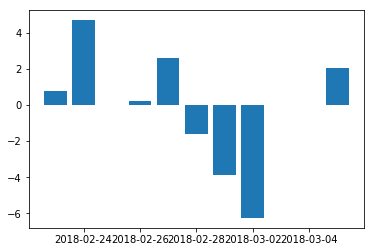

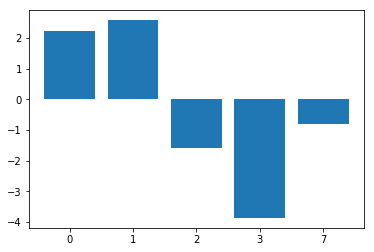

In [101]:
by_date = plt.bar(df2['Date Only'], df2['weightedSum'])
plt.show()
by_day = plt.bar(df3['wkndLbel'], df3['daySum'])
plt.show()

In [22]:
#hashtags = ['#guns since:2018-02-14', '#maga']

In [23]:
#targets = [hashtags]